
Travelling Salesman Problem
---

---


Travelling Salesman Poblem (TSP) sebuah permasalahan dalam sebuah perjalanan yang bertujuan untuk mendapat rute terpendek jika destinasi lebih dari satu tanpa kembali ke tempat yang sama. Permasalahan ini termasuk dalam NP-Complete problems. Terdapat berbagai macam algoritma untuk penyelesaian yang akan dibahas dalam notebook ini.


Metode Brute Force

---
Metode brute force adalah metode yang melakukan iterasi terhadap setiap kasus perjalanan yang ada. Algoritma ini memiliki kompleksitas O((n-1)!). Kompleksitas tersebut membuat metode brute dorce menjadi lambat untuk dijalankan. Namun demikian, rute yang dihasilkan akan selalu rute terpendek karena sudah mengecek setiap kondisi yang ada.





In [7]:
def BruteForce(listo):
    import itertools
    indeks = [a for a in range(1,len(listo))]
    minim = 10**10
    rute = []
    for p in list(itertools.permutations(indeks)):
        p = list(p)
        p.insert(0,0), p.append(0)
        res = 0
        count = 0
        for k in range(len(p)-1):
            res += listo[p[k]][p[k+1]]
        if res < minim:
            minim = res
            rute = p
    return minim

Algoritma Greedy


---
Algoritma ini dilakukan dengan langsung mengambil jarak terpendek dari satu tempat ke tempat lainnya. Kelebihan algoritma ini adalah kompleksitas-nya tergolong kecil, yaitu O(n-1). Akan tetapi, kekurangan dari algoritma ini adalah rute yang dihasilkan tidak selalu menjadi yang terpendek, namun untuk kebanyakan kasus hasilnya sudah cukup baik.


In [8]:
def Greedy(rute):
    n = len(rute)
    visited = [False for a in range(n)]
    visited[0] = True
    path = [0]
    distance = 0
    for i in range(n-1):
        distance_now = 10**10
        for j in range(n):
            if (visited[j]):
                continue
            if (rute[path[i]][j] < distance_now):
                distance_now = rute[path[i]][j]
                place = j
        visited[place] = True
        path.append(place)
        distance += distance_now
    distance += rute[path[n-1]][0]
    path.append(0)
    return distance

Heuristik

---
Metode heuristik adalah metode melakukan subtour untuk tempat yang dikunjungi mulai dari (0,0), dan dari (0,0) akan dibuat subtour, seperti (0,1)->(1,0), (0,2)->(2,0) dan seterusnya. Metode heuristik akan langsung mengambil rute dengan penambahan jarak terkecil dalam setiap penggantian subtournya. 

In [9]:
def Heuristik(rute):
    n = len(rute)
    count = 2
    visited = [False for a in range(n)]
    path = [0,0]
    visited[0] = True
    distance = 0
    for i in range(n-1):
        distance_now = 10**10
        place = []
        for j in range(1,count):
            for k in range(n):
                if (visited[k]):
                    continue
                substitute = rute[path[j-1]][k] + rute[k][path[j]] - rute[path[j-1]][path[j]]
                if (substitute < distance_now):
                    distance_now = substitute
                    place = [k,j]
        distance += distance_now
        visited[place[0]] = True
        path.insert(place[1], place[0])
        count += 1
    return distance

Uji Keefektifan Algoritma yang Tersedia dengan Metode Brute Force

---

In [13]:
import random
total_test = 100
total_city = 10
accuracy_greedy = []
accuracy_heuristic = []
for city in range(3, total_city+1):
    count_gr = count_he = 0
    for i in range(total_test):
        generated = [[random.randint(1,1000) for i in range(city)] for j in range(city)]
        for i in range(city):
            generated[i][i] = 0
        bf = BruteForce(generated)
        gr = Greedy(generated)
        he = Heuristik(generated)
        if (bf == he):
            count_he += 1
        if (bf == gr):
            count_gr += 1
    accuracy_greedy.append(count_gr)
    accuracy_heuristic.append(count_he)

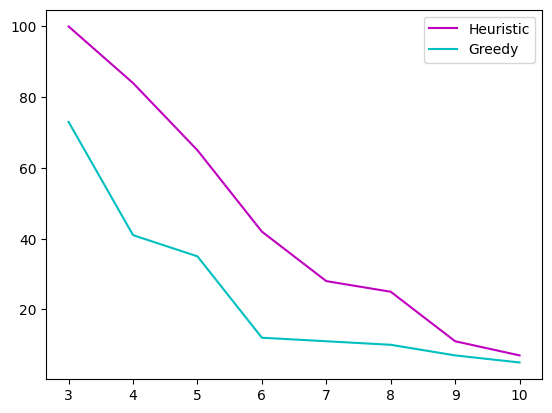

In [14]:
import matplotlib.pyplot as plt
temp = [a for a in range(3, total_city+1)]
plt.plot(temp, accuracy_heuristic, 'm', label='Heuristic')
plt.plot(temp, accuracy_greedy, 'c', label='Greedy')
plt.legend(loc='upper right')
plt.show()